In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt

data=pd.read_csv('C:\\Users\\Utsav\\Desktop\\Projects\\Nuclear Property Prediction (EoS)\\case1.csv', sep=',',header=0)
data.head()

,e0,rho0,k0,q0,jo,l0,ksym0,nsmas,rmax,r14,lambda10,lambda14,lambda18,vs,qsym
0,-15.8689,0.1611,224.7651,238.4824,35.3659,50.6193,-110.1518,2.1004,10.2722,12.1612,2488.6715,333.8504,49.0337,0.9998,423.7202
1,-16.1900,0.1613,234.2391,114.2765,36.5871,52.8665,-76.1168,2.1769,10.6051,12.3266,2791.1309,395.8141,64.0643,0.9998,180.5748
2,-15.7564,0.1656,232.0309,190.5430,34.3259,44.7315,-67.6100,2.1513,10.4025,11.9278,2479.1626,351.7705,56.3647,0.9995,385.6867
3,-16.0897,0.1635,259.2558,172.7730,32.5705,57.5269,-84.8941,2.2118,10.8058,12.6223,3119.9209,441.2771,73.6572,0.9991,236.2859
4,-16.5004,0.1560,259.6723,253.9081,32.0063,48.0632,-90.6544,2.2528,10.9196,12.5597,3098.3256,467.4262,82.1830,0.9990,428.4234


In [2]:
X = data.iloc[:,0:7]
X.head()

,e0,rho0,k0,q0,jo,l0,ksym0
0,-15.8689,0.1611,224.7651,238.4824,35.3659,50.6193,-110.1518
1,-16.1900,0.1613,234.2391,114.2765,36.5871,52.8665,-76.1168
2,-15.7564,0.1656,232.0309,190.5430,34.3259,44.7315,-67.6100
3,-16.0897,0.1635,259.2558,172.7730,32.5705,57.5269,-84.8941
4,-16.5004,0.1560,259.6723,253.9081,32.0063,48.0632,-90.6544


In [3]:
y_nsmas = data.iloc[:, 7].values
y_rmax = data.iloc[:,8].values
y_r14 = data.iloc[:,9].values
y_lambda14 = data.iloc[:, 11].values
np.shape(X.values)

(1866, 7)

# Visualization

## Feature Pair Plots

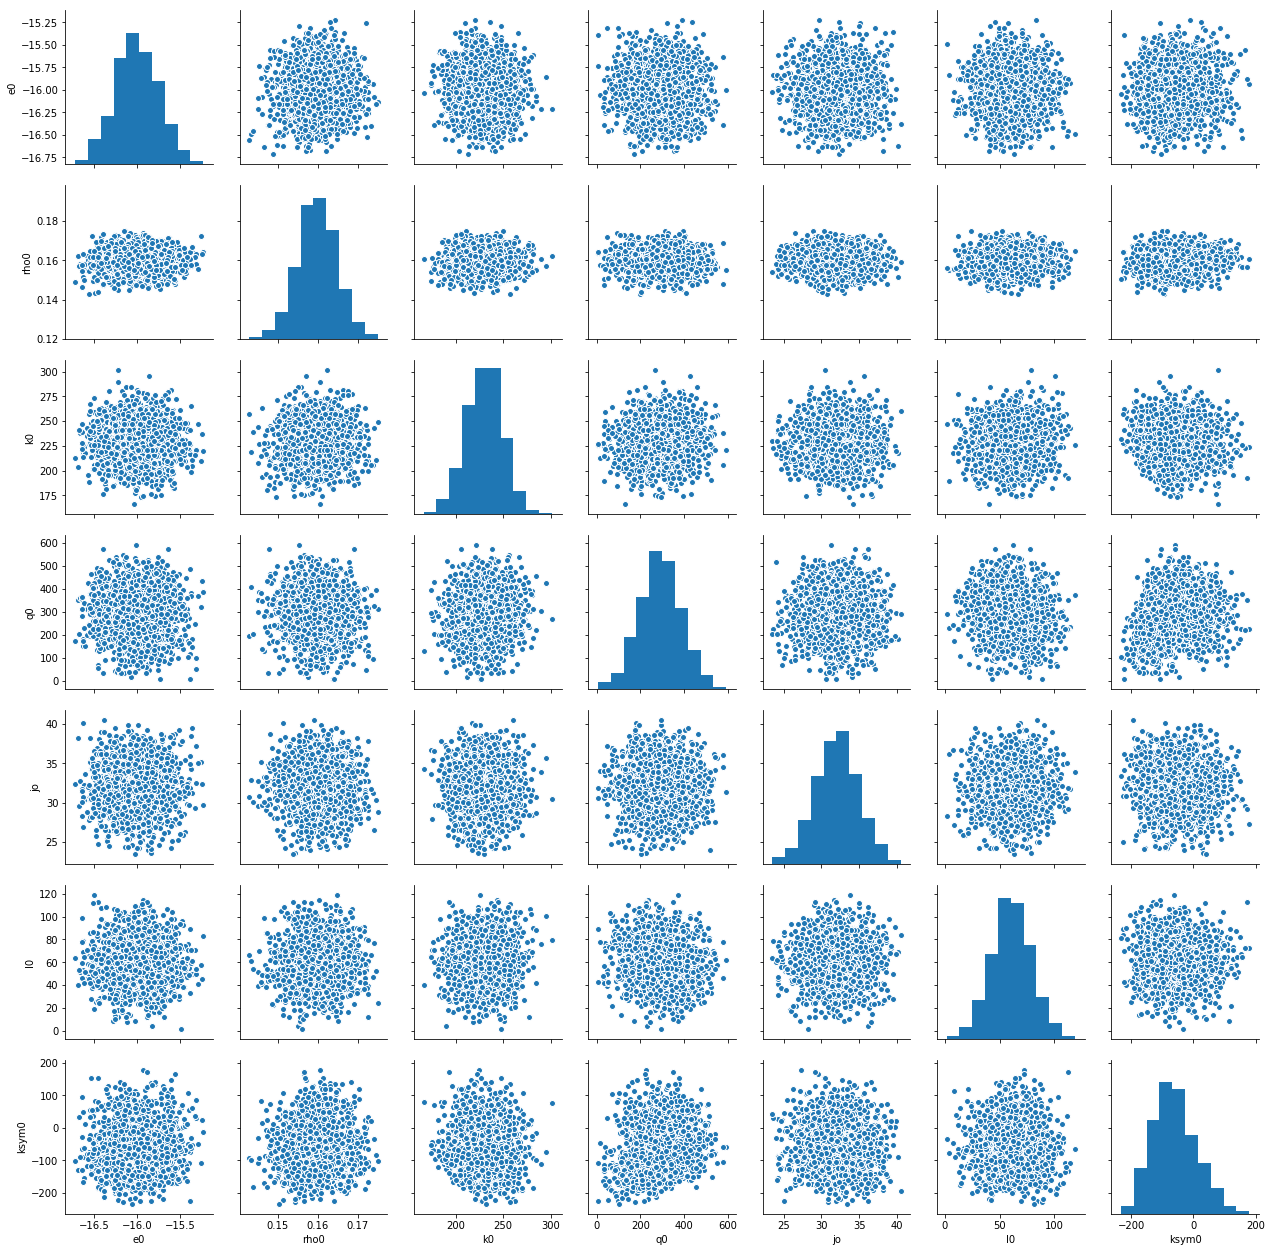

In [4]:
import seaborn as sns
sns.pairplot(X)

In [12]:
def random_forest(y_target):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    reg = RandomForestRegressor().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test, y_pred))))
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

# NSMAS

C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 0.04402570706559228


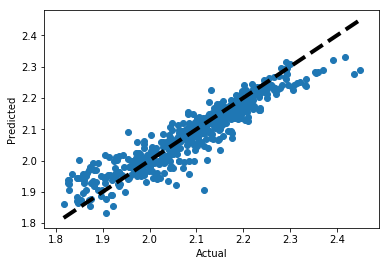

In [13]:
random_forest(y_nsmas)

In [86]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6],
                     'C': [1, 10, 100, 1000, 10000, 100000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(
        SVR(), tuned_parameters, scoring='neg_mean_squared_error'
    )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# reg = SVR(C=100, gamma=1e-2, kernel='rbf').fit(X_train, y_train)
# y_pred = reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.21502702588469735


In [88]:
clf.best_params_

{'C': 10000, 'gamma': 1e-05, 'kernel': 'rbf'}

# RMAX

RMSE: 0.18873066595441765


C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


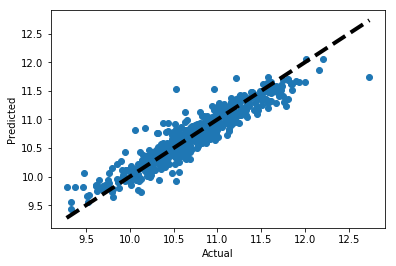

In [7]:
random_forest(y_rmax)

# R14

RMSE: 0.48739959506464975


C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


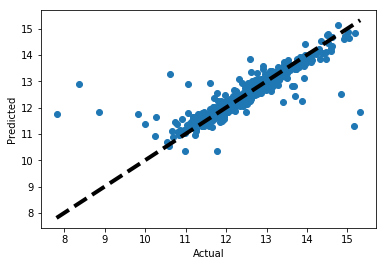

In [8]:
random_forest(y_r14)

# Lambda14

RMSE: 14.377233079821401


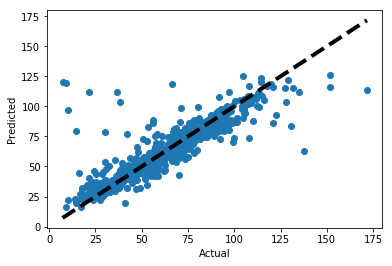

In [35]:
random_forest(y_lambda14)